In [ ]:
# RUN THIS COMMAND ONLY IF YOU USE GOOGLE COLAB.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# RUN THIS COMMAND ONLY IF YOU USE GOOGLE COLAB.
%cd drive/MyDrive/TechLabs/02_Data\ Manipulation/Part\ C\ -\ Pandas

[Errno 2] No such file or directory: 'drive/MyDrive/TechLabs/02_Data Manipulation/Part C - Pandas'
/content/drive/MyDrive/TechLabs/02_Data Manipulation/Part C - Pandas


In [ ]:
# This is the convention used to import Pandas.
import pandas as pd
import numpy as np

In [ ]:
# These commands load the data from googlecolab
waste = pd.read_csv("data/cei_pc031_page_linear.csv")
recycle = pd.read_csv("data/sdg_11_60_page_linear.csv")

In [ ]:
#Dataset 1: Generation of municipal waste per capita in kg (Europe)
waste.head()

,DATAFLOW,LAST UPDATE,freq,wst_oper,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:CEI_PC031(1.0),17/02/23 23:00:00,A,GEN,KG_HAB,AL,2013,325,s
1,ESTAT:CEI_PC031(1.0),17/02/23 23:00:00,A,GEN,KG_HAB,AL,2014,425,s
2,ESTAT:CEI_PC031(1.0),17/02/23 23:00:00,A,GEN,KG_HAB,AL,2015,491,s
3,ESTAT:CEI_PC031(1.0),17/02/23 23:00:00,A,GEN,KG_HAB,AL,2016,452,e
4,ESTAT:CEI_PC031(1.0),17/02/23 23:00:00,A,GEN,KG_HAB,AL,2017,436,e


In [ ]:
#Dataset 2: Recycling rate of municipal waste in % (Europe)
recycle.head()

,DATAFLOW,LAST UPDATE,freq,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:SDG_11_60(1.0),13/01/23 23:00:00,A,PC,AL,2020,18.1,NaN
1,ESTAT:SDG_11_60(1.0),13/01/23 23:00:00,A,PC,AL,2021,18.7,NaN
2,ESTAT:SDG_11_60(1.0),13/01/23 23:00:00,A,PC,AT,2000,63.4,NaN
3,ESTAT:SDG_11_60(1.0),13/01/23 23:00:00,A,PC,AT,2001,64.3,e
4,ESTAT:SDG_11_60(1.0),13/01/23 23:00:00,A,PC,AT,2002,62.5,e


In [ ]:
#delete irrelevant columns for the data analysis from both datasets
waste.drop("DATAFLOW", inplace=True, axis=1)
waste.drop("LAST UPDATE", inplace=True, axis=1)
waste.drop("freq", inplace=True, axis=1)
waste.drop("wst_oper", inplace=True, axis=1)
waste.drop("unit", inplace=True, axis=1)
waste.drop("OBS_FLAG", inplace=True, axis=1)
recycle.drop("DATAFLOW", inplace=True, axis=1)
recycle.drop("LAST UPDATE", inplace=True, axis=1)
recycle.drop("freq", inplace=True, axis=1)
recycle.drop("unit", inplace=True, axis=1)
recycle.drop("OBS_FLAG", inplace=True, axis=1)

In [ ]:
#rename columns in both datasets
waste.rename(columns={"geo": "region_id", "TIME_PERIOD":"year", "OBS_VALUE":"municipal_waste_per_capita_kg"}, inplace=True)
recycle.rename(columns={"geo": "region_id", "TIME_PERIOD":"year", "OBS_VALUE":"recycling_rate_municipal_waste_percent"}, inplace=True)

In [ ]:
waste.head()

,region_id,year,municipal_waste_per_capita_kg
0,AL,2013,325
1,AL,2014,425
2,AL,2015,491
3,AL,2016,452
4,AL,2017,436


In [ ]:
recycle.head()

,region_id,year,recycling_rate_municipal_waste_percent
0,AL,2020,18.1
1,AL,2021,18.7
2,AT,2000,63.4
3,AT,2001,64.3
4,AT,2002,62.5


In [ ]:
#unique values of series object ["region_id"] for Dataset 1
waste["region_id"].unique()

array(['AL', 'AT', 'BA', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE',
       'EL', 'ES', 'EU27_2020', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT',
       'LT', 'LU', 'LV', 'ME', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO',
       'RS', 'SE', 'SI', 'SK', 'TR', 'UK', 'XK'], dtype=object)

In [ ]:
waste["region_id"].nunique()

39

In [ ]:
#unique values of series object ["region_id"] for Dataset 2
recycle["region_id"].unique()

array(['AL', 'AT', 'BA', 'BE', 'BG', 'CH', 'CY', 'CZ', 'DE', 'DK', 'EE',
       'EL', 'ES', 'EU27_2020', 'FI', 'FR', 'HR', 'HU', 'IE', 'IS', 'IT',
       'LT', 'LU', 'LV', 'ME', 'MK', 'MT', 'NL', 'NO', 'PL', 'PT', 'RO',
       'RS', 'SE', 'SI', 'SK', 'TR', 'UK', 'XK'], dtype=object)

In [ ]:
recycle["region_id"].nunique()

39

In [ ]:
#add a new column and assign the country name to it: Dataset 1
waste["country_name"]=waste.region_id.replace({"EU27_2020": "European Union - 27 countries (from 2020)",
"BE": "Belgium",
"BG": "Bulgaria",
"CZ": "Czechia",
"DK": "Denmark",
"DE": "Germany (until 1990 former territory of the FRG)",
"EE": "Estonia",
"IE": "Ireland",
"EL": "Greece",
"ES": "Spain",
"FR": "France",
"HR": "Croatia",
"CY": "Cyprus",
"IT": "Italy",
"IS": "Iceland",
"LV": "Latvia",
"LT": "Lithuania",
"LU": "Luxembourg",
"HU": "Hungary",
"MT": "Malta",
"NL": "Netherlands",
"AT": "Austria",
"PL": "Poland",
"PT": "Portugal",
"RO": "Romania",
"SI": "Slovenia",
"SK": "Slovakia",
"FI": "Finland",
"SE": "Sweden",
"IS": "Iceland",
"LI": "Lichtenstein",
"NO": "Norway",
"CH": "Switzerland",
"UK": "United Kingdom",
"BA": "Bosnia and Herzegovina",
"ME": "Montenegro",
"MK": "North Macedonia",
"AL": "Albania",
"RS": "Serbia",
"TR": "Türkiye",
"XK": "Kosovo (under United Nations Security Council Resolution 1244/99)"
})

In [ ]:
#add a new column and assign the country name to it: Dataset 2
recycle["country_name"]=recycle.region_id.replace({"EU27_2020": "European Union - 27 countries (from 2020)",
"BE": "Belgium",
"BG": "Bulgaria",
"CZ": "Czechia",
"DK": "Denmark",
"DE": "Germany (until 1990 former territory of the FRG)",
"EE": "Estonia",
"IE": "Ireland",
"EL": "Greece",
"ES": "Spain",
"FR": "France",
"HR": "Croatia",
"CY": "Cyprus",
"IT": "Italy",
"LV": "Latvia",
"LT": "Lithuania",
"LU": "Luxembourg",
"HU": "Hungary",
"MT": "Malta",
"NL": "Netherlands",
"AT": "Austria",
"PL": "Poland",
"PT": "Portugal",
"RO": "Romania",
"ST": "Slovenia",
"SK": "Slovakia",
"FI": "Finland",
"SE": "Sweden",
"SI": "Iceland",
"NO": "Norway",
"CH": "Switzerland",
"UK": "United Kingdom",
"BA": "Bosnia and Herzegovina",
"ME": "Montenegro",
"MK": "North Macedonia",
"AL": "Albania",
"RS": "Serbia",
"TR": "Türkiye",
"XK": "Kosovo (under United Nations Security Council Resolution 1244/99)"
})

In [ ]:
waste.head()

,region_id,year,municipal_waste_per_capita_kg,country_name
0,AL,2013,325,Albania
1,AL,2014,425,Albania
2,AL,2015,491,Albania
3,AL,2016,452,Albania
4,AL,2017,436,Albania


In [ ]:
recycle.head()

,region_id,year,recycling_rate_municipal_waste_percent,country_name
0,AL,2020,18.1,Albania
1,AL,2021,18.7,Albania
2,AT,2000,63.4,Austria
3,AT,2001,64.3,Austria
4,AT,2002,62.5,Austria


In [ ]:
#move the column ["country_name"] before ["region_id"]: Dataset 1
column_to_move = waste.pop("country_name")
waste.insert(0, "country_name", column_to_move)
waste.head()


,country_name,region_id,year,municipal_waste_per_capita_kg
0,Albania,AL,2013,325
1,Albania,AL,2014,425
2,Albania,AL,2015,491
3,Albania,AL,2016,452
4,Albania,AL,2017,436


In [ ]:
#move the column ["country_name"] before ["region_id"]: Dataset 2
column_to_move = recycle.pop("country_name")
recycle.insert(0, "country_name", column_to_move)
recycle.head()

,country_name,region_id,year,recycling_rate_municipal_waste_percent
0,Albania,AL,2020,18.1
1,Albania,AL,2021,18.7
2,Austria,AT,2000,63.4
3,Austria,AT,2001,64.3
4,Austria,AT,2002,62.5


In [ ]:
#INNER JOIN between 2 DataFrames--> set of records that have a mutual value in the specified joining column(s)
joined=waste.merge(recycle, on =["country_name", "region_id", "year"])
joined.head(30)

,country_name,region_id,year,municipal_waste_per_capita_kg,recycling_rate_municipal_waste_percent
0,Albania,AL,2020,369,18.1
1,Albania,AL,2021,311,18.7
2,Austria,AT,2000,580,63.4
3,Austria,AT,2001,576,64.3
4,Austria,AT,2002,608,62.5
5,Austria,AT,2003,607,64.2
6,Austria,AT,2004,574,57.4
7,Austria,AT,2005,575,58.3
8,Austria,AT,2006,597,59.2
9,Austria,AT,2007,597,60.2


In [ ]:
joined.replace(0, np.nan, inplace=True)
joined.head(30)

,country_name,region_id,year,municipal_waste_per_capita_kg,recycling_rate_municipal_waste_percent
0,Albania,AL,2020,369,18.1
1,Albania,AL,2021,311,18.7
2,Austria,AT,2000,580,63.4
3,Austria,AT,2001,576,64.3
4,Austria,AT,2002,608,62.5
5,Austria,AT,2003,607,64.2
6,Austria,AT,2004,574,57.4
7,Austria,AT,2005,575,58.3
8,Austria,AT,2006,597,59.2
9,Austria,AT,2007,597,60.2


In [ ]:
joined.dropna(inplace=True)
joined.head(40)

,country_name,region_id,year,municipal_waste_per_capita_kg,recycling_rate_municipal_waste_percent
0,Albania,AL,2020,369,18.1
1,Albania,AL,2021,311,18.7
2,Austria,AT,2000,580,63.4
3,Austria,AT,2001,576,64.3
4,Austria,AT,2002,608,62.5
5,Austria,AT,2003,607,64.2
6,Austria,AT,2004,574,57.4
7,Austria,AT,2005,575,58.3
8,Austria,AT,2006,597,59.2
9,Austria,AT,2007,597,60.2


In [ ]:
#sorting by ["country_name"] then by ["year"]
joined.sort_values(["country_name", "year"])
joined.head(40)

,country_name,region_id,year,municipal_waste_per_capita_kg,recycling_rate_municipal_waste_percent
0,Albania,AL,2020,369,18.1
1,Albania,AL,2021,311,18.7
2,Austria,AT,2000,580,63.4
3,Austria,AT,2001,576,64.3
4,Austria,AT,2002,608,62.5
5,Austria,AT,2003,607,64.2
6,Austria,AT,2004,574,57.4
7,Austria,AT,2005,575,58.3
8,Austria,AT,2006,597,59.2
9,Austria,AT,2007,597,60.2


In [ ]:
joined.isna()

,country_name,region_id,year,municipal_waste_per_capita_kg,recycling_rate_municipal_waste_percent
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
672,False,False,False,False,False
673,False,False,False,False,False
674,False,False,False,False,False
675,False,False,False,False,False


In [ ]:
%matplotlib inline
import seaborn as sns  #for plotting
sns.set_style("darkgrid")
import matplotlib.pyplot as plt # for showing plots
from scipy import stats

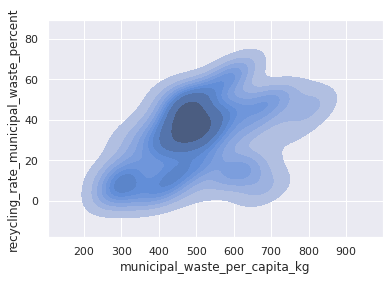

In [ ]:
from scipy.stats import pearsonr
joined_plot = joined[["municipal_waste_per_capita_kg","recycling_rate_municipal_waste_percent"]].dropna()
#determine the annotation's position
r = "r = " + str(round(pearsonr(joined_plot["municipal_waste_per_capita_kg"], joined_plot["recycling_rate_municipal_waste_percent"])[0], 2))
sns.kdeplot(data=joined, x= "municipal_waste_per_capita_kg", y="recycling_rate_municipal_waste_percent",  fill = True).annotate(r, xy=(50, 50), xycoords="data");

In [ ]:
joined["municipal_waste_per_capita_kg"].corr(joined["recycling_rate_municipal_waste_percent"])

0.4467410572847336

<function matplotlib.pyplot.show(close=None, block=None)>

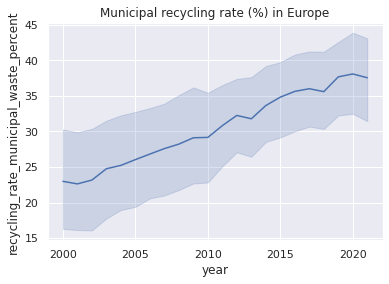

In [ ]:
#plot
sns.lineplot(x="year", y="recycling_rate_municipal_waste_percent", data = joined)
plt.title('Municipal recycling rate (%) in Europe')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

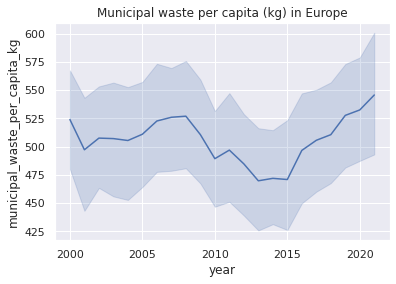

In [ ]:
#plot
sns.lineplot(x="year", y="municipal_waste_per_capita_kg", data = joined)
plt.title('Municipal waste per capita (kg) in Europe')
plt.show